# 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from phik import phik_matrix

from utils import *

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Set options for displaying dataframe
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
pd.set_option('display.float_format', lambda x: '{:.2f}'.format(x))

# 2. Load data & Basic information

In [3]:
prev = load_data('dseb63_previous_application.csv', 
                 filename_train='dseb63_application_train.csv',
                 filename_test='dseb63_application_test.csv',
                 verbose=3)

Table: dseb63_previous_application.csv
Shape: (1413701, 37)

Number of categorical variables: 16
Number of numerical variables: 21

Number of unique values of SK_ID_CURR: 291057
Number of unique values of SK_ID_PREV: 1413701

Number of duplicate values: 0

Shape of train set: (246009, 123)
Number of overlapping SK_ID_CURR in dseb63_previous_application.csv and dseb63_application_train.csv: 232826

Shape of test set: (61502, 122)
Number of overlapping SK_ID_CURR in dseb63_previous_application.csv and dseb63_application_test.csv: 58231


,SK_ID_PREV,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL,SK_ID_CURR,TARGET
0,2030495,Consumer loans,1730.43,17145.00,17145.00,0.00,17145.00,SATURDAY,15,Y,1,0.00,0.18,0.87,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.00,middle,POS mobile with interest,365243.00,-42.00,300.00,-42.00,-37.00,0.00,293189,NaN
1,1696966,Consumer loans,68258.65,1800000.00,1754721.00,180000.00,1800000.00,SATURDAY,18,Y,1,0.10,NaN,NaN,XAP,Refused,-472,Cash through the bank,SCO,NaN,Repeater,Clothing and Accessories,POS,XNA,Regional / Local,55,Furniture,36.00,low_normal,POS industry with interest,NaN,NaN,NaN,NaN,NaN,NaN,293189,NaN
2,2154916,Consumer loans,12417.39,108400.50,119848.50,0.00,108400.50,SUNDAY,14,Y,1,0.00,NaN,NaN,XAP,Approved,-548,Cash through the bank,XAP,NaN,New,Furniture,POS,XNA,Stone,196,Furniture,12.00,middle,POS industry with interest,365243.00,-512.00,-182.00,-392.00,-387.00,0.00,293189,NaN
3,2802425,Cash loans,25188.62,607500.00,679671.00,NaN,607500.00,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.00,low_action,Cash X-Sell: low,365243.00,-134.00,916.00,365243.00,365243.00,1.00,91587,0.00
4,1536272,Cash loans,21709.12,450000.00,512370.00,NaN,450000.00,WEDNESDAY,9,Y,1,NaN,NaN,NaN,XNA,Approved,-515,XNA,XAP,NaN,Repeater,XNA,Cash,x-sell,AP+ (Cash loan),6,XNA,36.00,low_normal,Cash X-Sell: low,365243.00,-485.00,565.00,-155.00,-147.00,1.00,91587,0.00


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1413701 entries, 0 to 1413700
Data columns (total 38 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1413701 non-null  int64  
 1   NAME_CONTRACT_TYPE           1413701 non-null  object 
 2   AMT_ANNUITY                  1106483 non-null  float64
 3   AMT_APPLICATION              1413701 non-null  float64
 4   AMT_CREDIT                   1413700 non-null  float64
 5   AMT_DOWN_PAYMENT             664161 non-null   float64
 6   AMT_GOODS_PRICE              1094176 non-null  float64
 7   WEEKDAY_APPR_PROCESS_START   1413701 non-null  object 
 8   HOUR_APPR_PROCESS_START      1413701 non-null  int64  
 9   FLAG_LAST_APPL_PER_CONTRACT  1413701 non-null  object 
 10  NFLAG_LAST_APPL_IN_DAY       1413701 non-null  int64  
 11  RATE_DOWN_PAYMENT            664161 non-null   float64
 12  RATE_INTEREST_PRIMARY        4791 non-null

# 3. Target column

In [4]:
prev.TARGET.value_counts(dropna=False)

TARGET
0.00    1033268
NaN      282810
1.00      97623
Name: count, dtype: int64

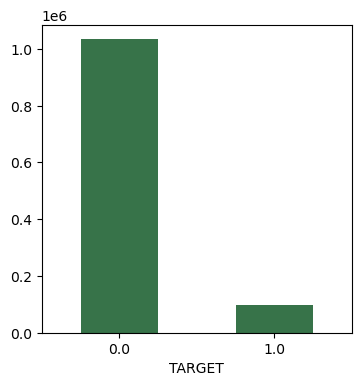

In [5]:
prev.TARGET.value_counts().plot.bar(color='#377349', figsize=(4,4), rot=0);

### Observation: Class imbalanced problem
- Data is highly imbalanced that the proportion between class 0 and class 1 is about 92:8
- There are 282810 records not having TARGET

# 4. Missing values

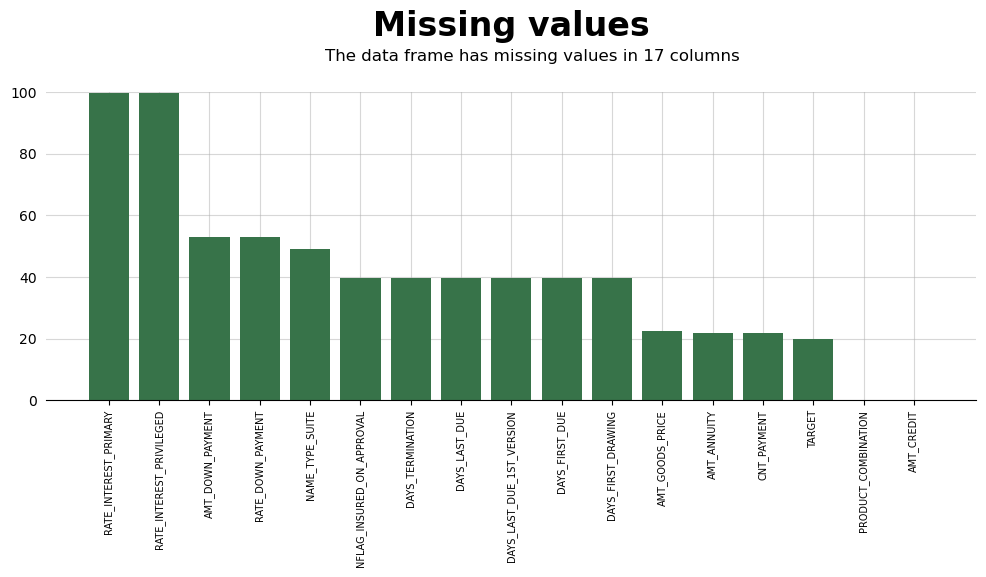

In [6]:
df_missing = create_df_missing(prev)
plot_df_missing(df_missing, x_title=0.5, x_subtitle=4.3)

### Observation
- Most of the features having more than 30% missing values except AMT_GOOD_PRICE, AMT_ANNUITY and CNT_PAYMENT are normalized information about the building and their descriptions are somewhat unclear.
- For features with fewer missing values, we can use regression to predict the missing values or fill with the mean of the values present, depending on the feature.
- For features with very high number of missing values, it is better to drop those columns as they give very less insight on analysis.

# 5. Define numeric and category features

In [7]:
prev, cate_prev, num_prev = validate_dtype(prev)

# 6. Imbalanced class

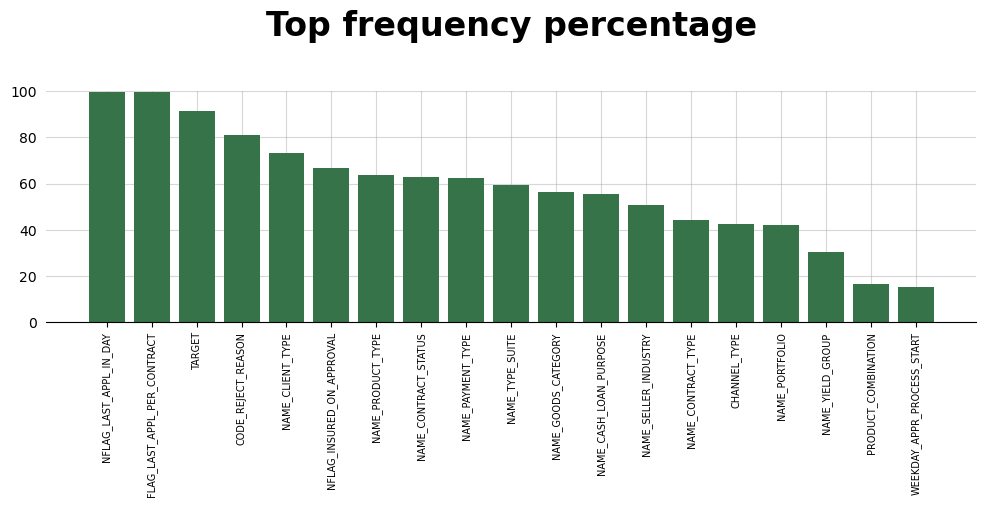

In [8]:
plot_imbalance(describe_class(cate_prev), x_title=0.5, figsize=(12,3))

# 7. Outlier

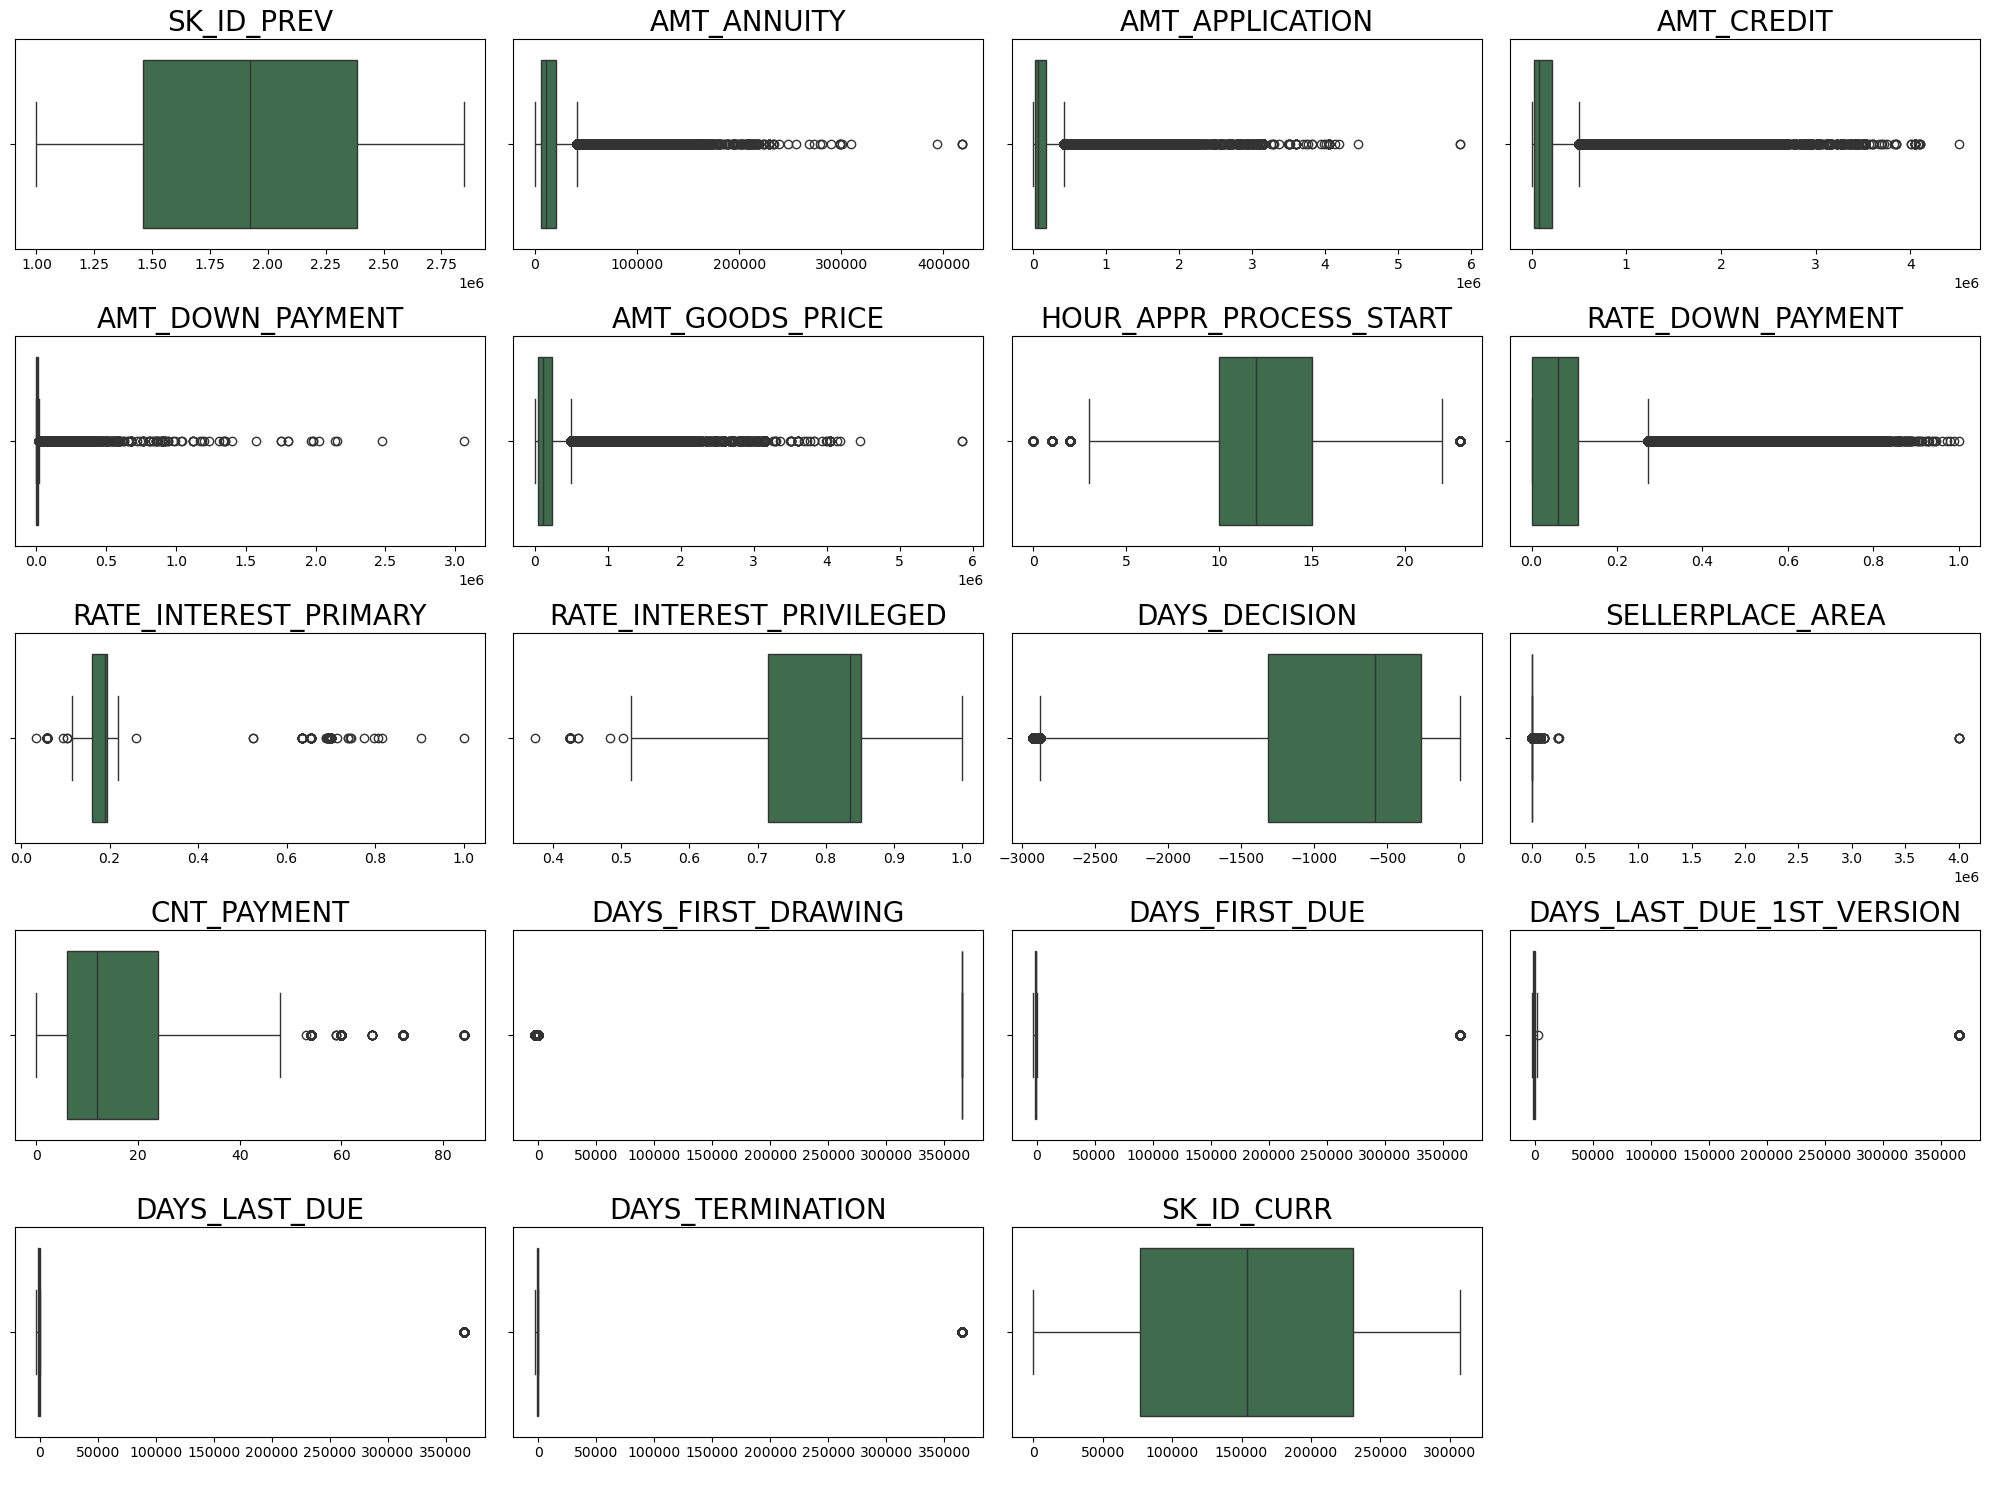

In [9]:
plot_boxplot(num_prev, figsize=(20, 15))

### Observation
Most features have many outliers and skewed distributions

# 8. Anomalies
## 8.1 Numerical values

In [10]:
day_to_year(num_prev).describe().T

,count,mean,std,min,25%,50%,75%,max
SK_ID_PREV,1413701.00,1922744.33,532715.34,1000001.00,1461346.00,1922698.00,2384012.00,2845381.00
AMT_ANNUITY,1106483.00,15837.18,14724.91,0.00,6257.86,11223.76,20420.78,418058.15
AMT_APPLICATION,1413701.00,175243.59,293622.19,0.00,19750.50,70870.50,180000.00,5850000.00
AMT_CREDIT,1413700.00,196354.09,319481.25,0.00,24880.50,80595.00,215640.00,4509688.50
AMT_DOWN_PAYMENT,664161.00,6655.32,20620.30,-0.90,0.00,1791.00,7695.00,3060045.00
AMT_GOODS_PRICE,1094176.00,226451.19,315937.60,0.00,49828.50,110245.50,229500.00,5850000.00
HOUR_APPR_PROCESS_START,1413701.00,12.48,3.33,0.00,10.00,12.00,15.00,23.00
RATE_DOWN_PAYMENT,664161.00,0.08,0.11,-0.00,0.00,0.06,0.11,1.00
RATE_INTEREST_PRIMARY,4791.00,0.19,0.09,0.03,0.16,0.19,0.19,1.00
RATE_INTEREST_PRIVILEGED,4791.00,0.77,0.10,0.37,0.72,0.84,0.85,1.00


### Observation
The year of employment has some positive values and can be up to 1000 years. 

**In this case, we can define "365243" as an anomalous value and fill it with np.nan**

In [11]:
prev['DAYS_FIRST_DRAWING'].replace(365243, np.nan, inplace= True)
prev['DAYS_FIRST_DUE'].replace(365243, np.nan, inplace= True)
prev['DAYS_LAST_DUE_1ST_VERSION'].replace(365243, np.nan, inplace= True)
prev['DAYS_LAST_DUE'].replace(365243, np.nan, inplace= True)
prev['DAYS_TERMINATION'].replace(365243, np.nan, inplace= True)

## 8.2 Categorical values

In [12]:
prev.NAME_PRODUCT_TYPE.value_counts(dropna=False)

NAME_PRODUCT_TYPE
XNA        900053
x-sell     385394
walk-in    128254
Name: count, dtype: int64

### Observation
Some columns contain "XNA" value which means not available. Therefore we have to replace these values by np.nan

# 9. Correlation

In [13]:
cmat = CorrelationMatrix(prev, drop_cols=['SK_ID_CURR', 'SK_ID_PREV'])

In [14]:
cmat.target_top()

,PhiK-Correlation
RATE_INTEREST_PRIMARY,0.12
NAME_CONTRACT_STATUS,0.09
CNT_PAYMENT,0.07
PRODUCT_COMBINATION,0.06
DAYS_DECISION,0.06
CODE_REJECT_REASON,0.06
SELLERPLACE_AREA,0.06
DAYS_LAST_DUE_1ST_VERSION,0.06
NAME_CONTRACT_TYPE,0.05
CHANNEL_TYPE,0.05


## 9.1 Numerical values

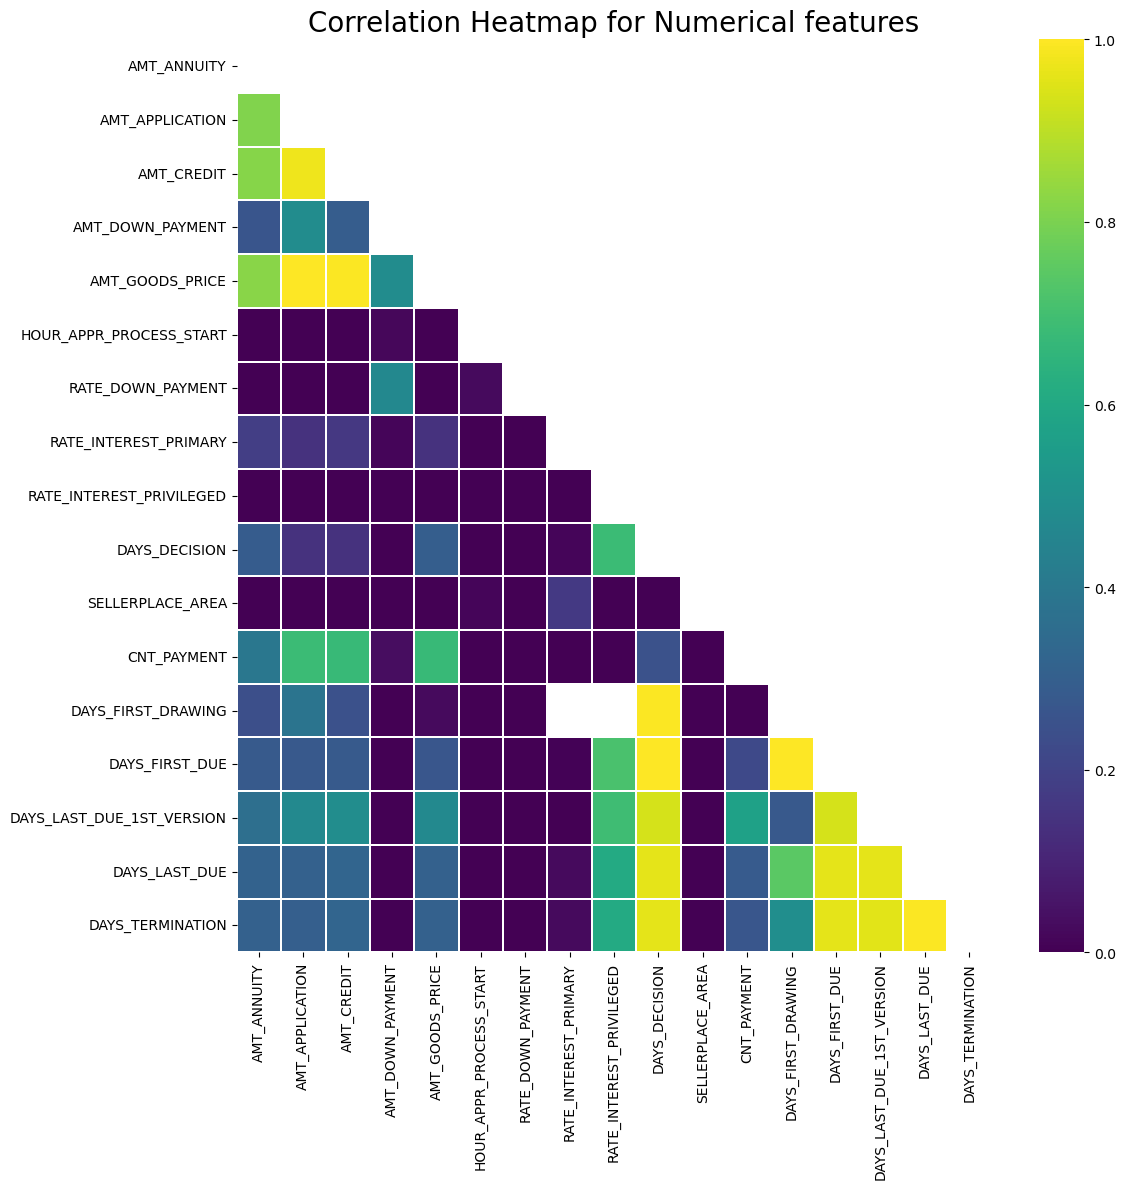

In [15]:
cmat.plot_correlation_matrix()

In [16]:
cmat.target_top_num()

,Correlation
DAYS_FIRST_DRAWING,0.10
DAYS_DECISION,0.04
RATE_INTEREST_PRIVILEGED,0.04
CNT_PAYMENT,0.03
DAYS_LAST_DUE_1ST_VERSION,0.03
DAYS_FIRST_DUE,0.03
HOUR_APPR_PROCESS_START,0.03
RATE_DOWN_PAYMENT,0.03
DAYS_LAST_DUE,0.02
DAYS_TERMINATION,0.02


### Observation
- The high correlation is particularly observed for features:
  + DAYS_TERMINATION and DAYS_LAST_DUE
  + AMT_CREDIT and AMT_APPLICATION
  + AMT_APPLICATION and AMT_GOODS_PRICE
  + AMT_CREDIT and AMT_ANNUITY
  + AMT_ANNUITY and AMT_CREDIT
  + AMT_CREDIT and AMT_GOODS_PRICE

## 9.2 Categorical values

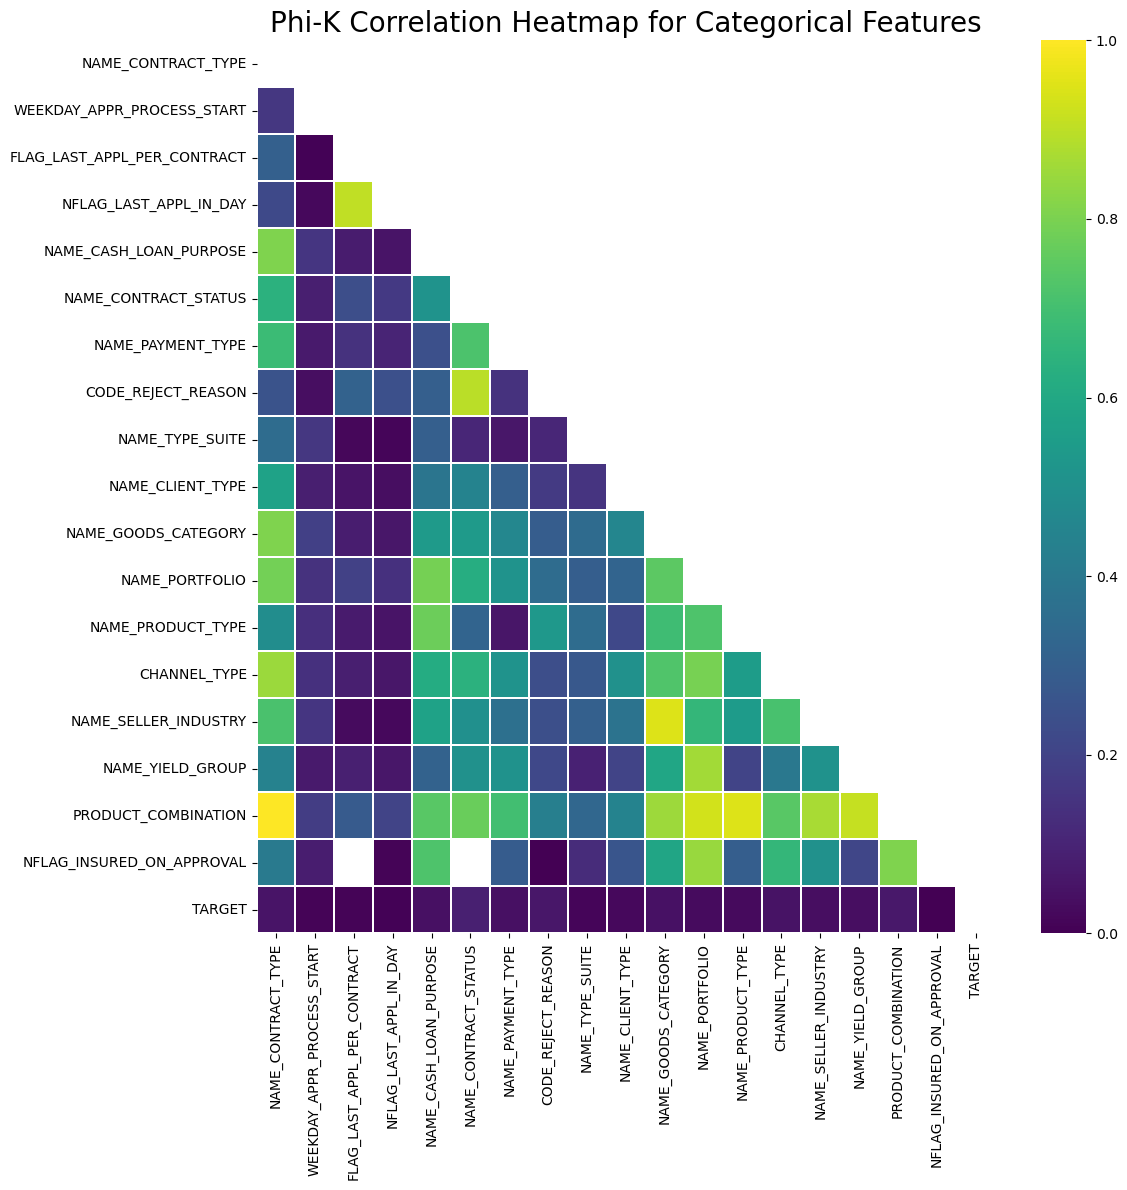

In [17]:
cmat.plot_phik_matrix()

In [18]:
cmat.target_top_cate()

,PhiK-Correlation
NAME_CONTRACT_STATUS,0.09
PRODUCT_COMBINATION,0.06
CODE_REJECT_REASON,0.06
NAME_CONTRACT_TYPE,0.05
CHANNEL_TYPE,0.05
NAME_GOODS_CATEGORY,0.05
NAME_CASH_LOAN_PURPOSE,0.04
NAME_PAYMENT_TYPE,0.04
NAME_SELLER_INDUSTRY,0.04
NAME_YIELD_GROUP,0.04


### Observation
- The feature PRODUCT_COMBINATION shows association with lots of other features such as NAME_CONTRACT_TYPE, NAME_PRODUCT_TYPE, NAME_PORTFOLIO
- If we look at the association with TARGET variable, we see that the features NAME_CONTRACT_STATUS, PRODUCT_COMBINATION, CODE_REJECT_REASON are some of the highest associated features, and would need further investigation

# 10. Categorical analysis

## 10.1 NAME_TYPE_SUITE

Total Number of unique categories of NAME_TYPE_SUITE = 8


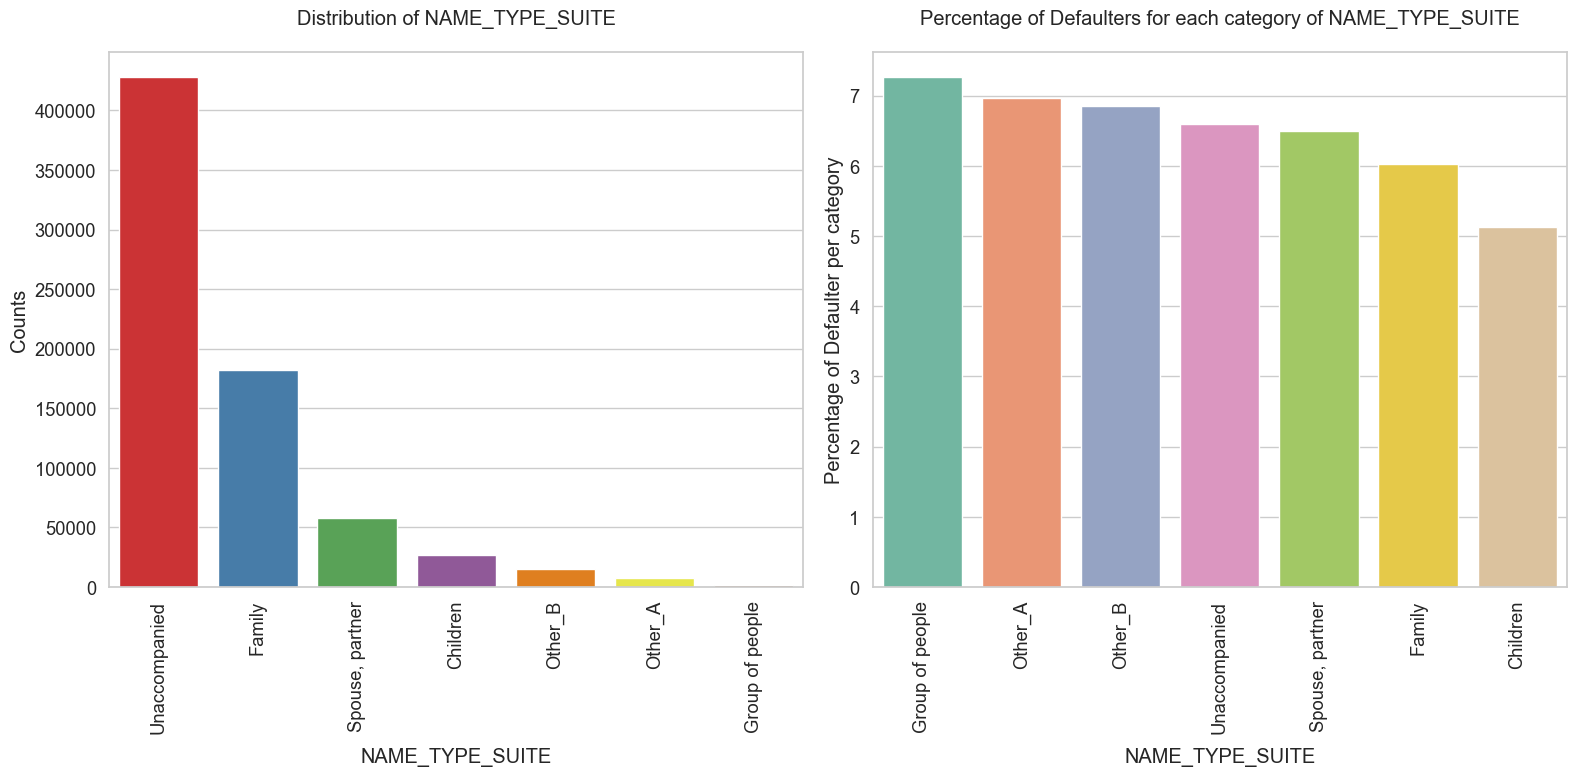

In [19]:
plot_categorical_variables_bar(prev, 'NAME_TYPE_SUITE')

### Observation
- The highest count is observed in the "Unaccompanied" category, indicating that the majority of loan applicants applied without any accompanying individuals. This is followed by the "Family" category, which has a significantly lower count. The remaining categories, namely "Spouse, partner," "Children," "Other_B," "Other_A," and "Group of people," have comparatively smaller counts, suggesting that they are less common
- Recommend to divide 'NAME_TYPE_SUITE' into 2 categories : 
  + Unaccompanied
  + Accompanied


## 10.2 NAME_CLIENT_TYPE

Total Number of unique categories of NAME_CLIENT_TYPE = 4


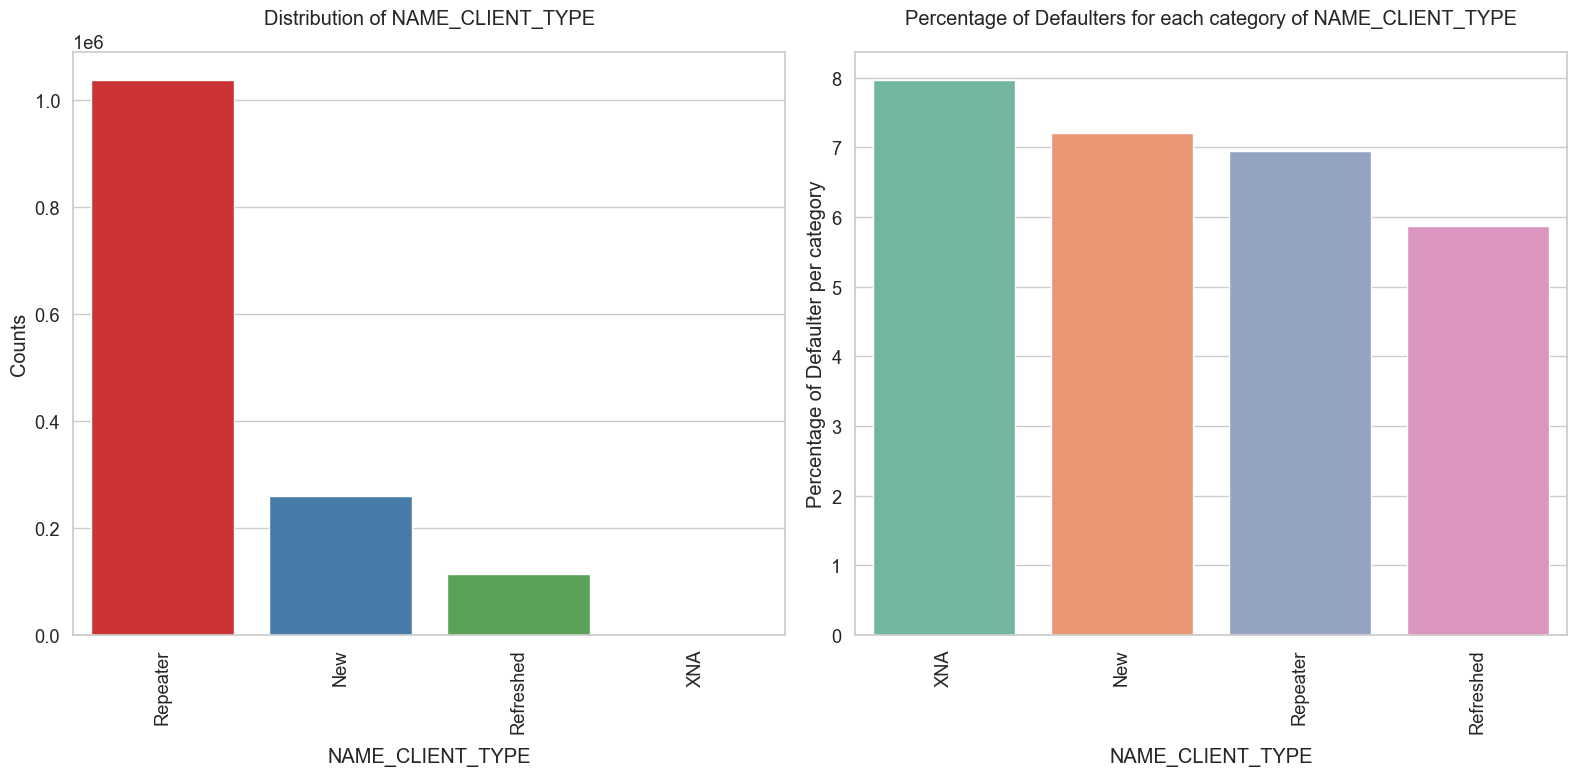

In [20]:
plot_categorical_variables_bar(prev, 'NAME_CLIENT_TYPE')

### Observation
- The majority of previous applications belong to the "Repeater" client type. This indicates that a large number of clients have applied for loans in the past and are now returning for another loan (loyal customers). 
- The next category is "New,", representing new clients who have applied for a loan for the first time. 
- Lastly, there are around 100,000 cases in the "Refreshed" category, indicating clients who have previously applied but are now returning after a certain period.
- In terms of default percent for current applications of clients with history of previous applications, current clients with previous applications have values of percent of defaults ranging from from 7.3%, 6.9% and 5.8% corresponding to client types in the past New, Repeater and Refreshed, respectivelly.

## 10.3 NAME_GOODS_CATEGORY

Total Number of unique categories of NAME_GOODS_CATEGORY = 27


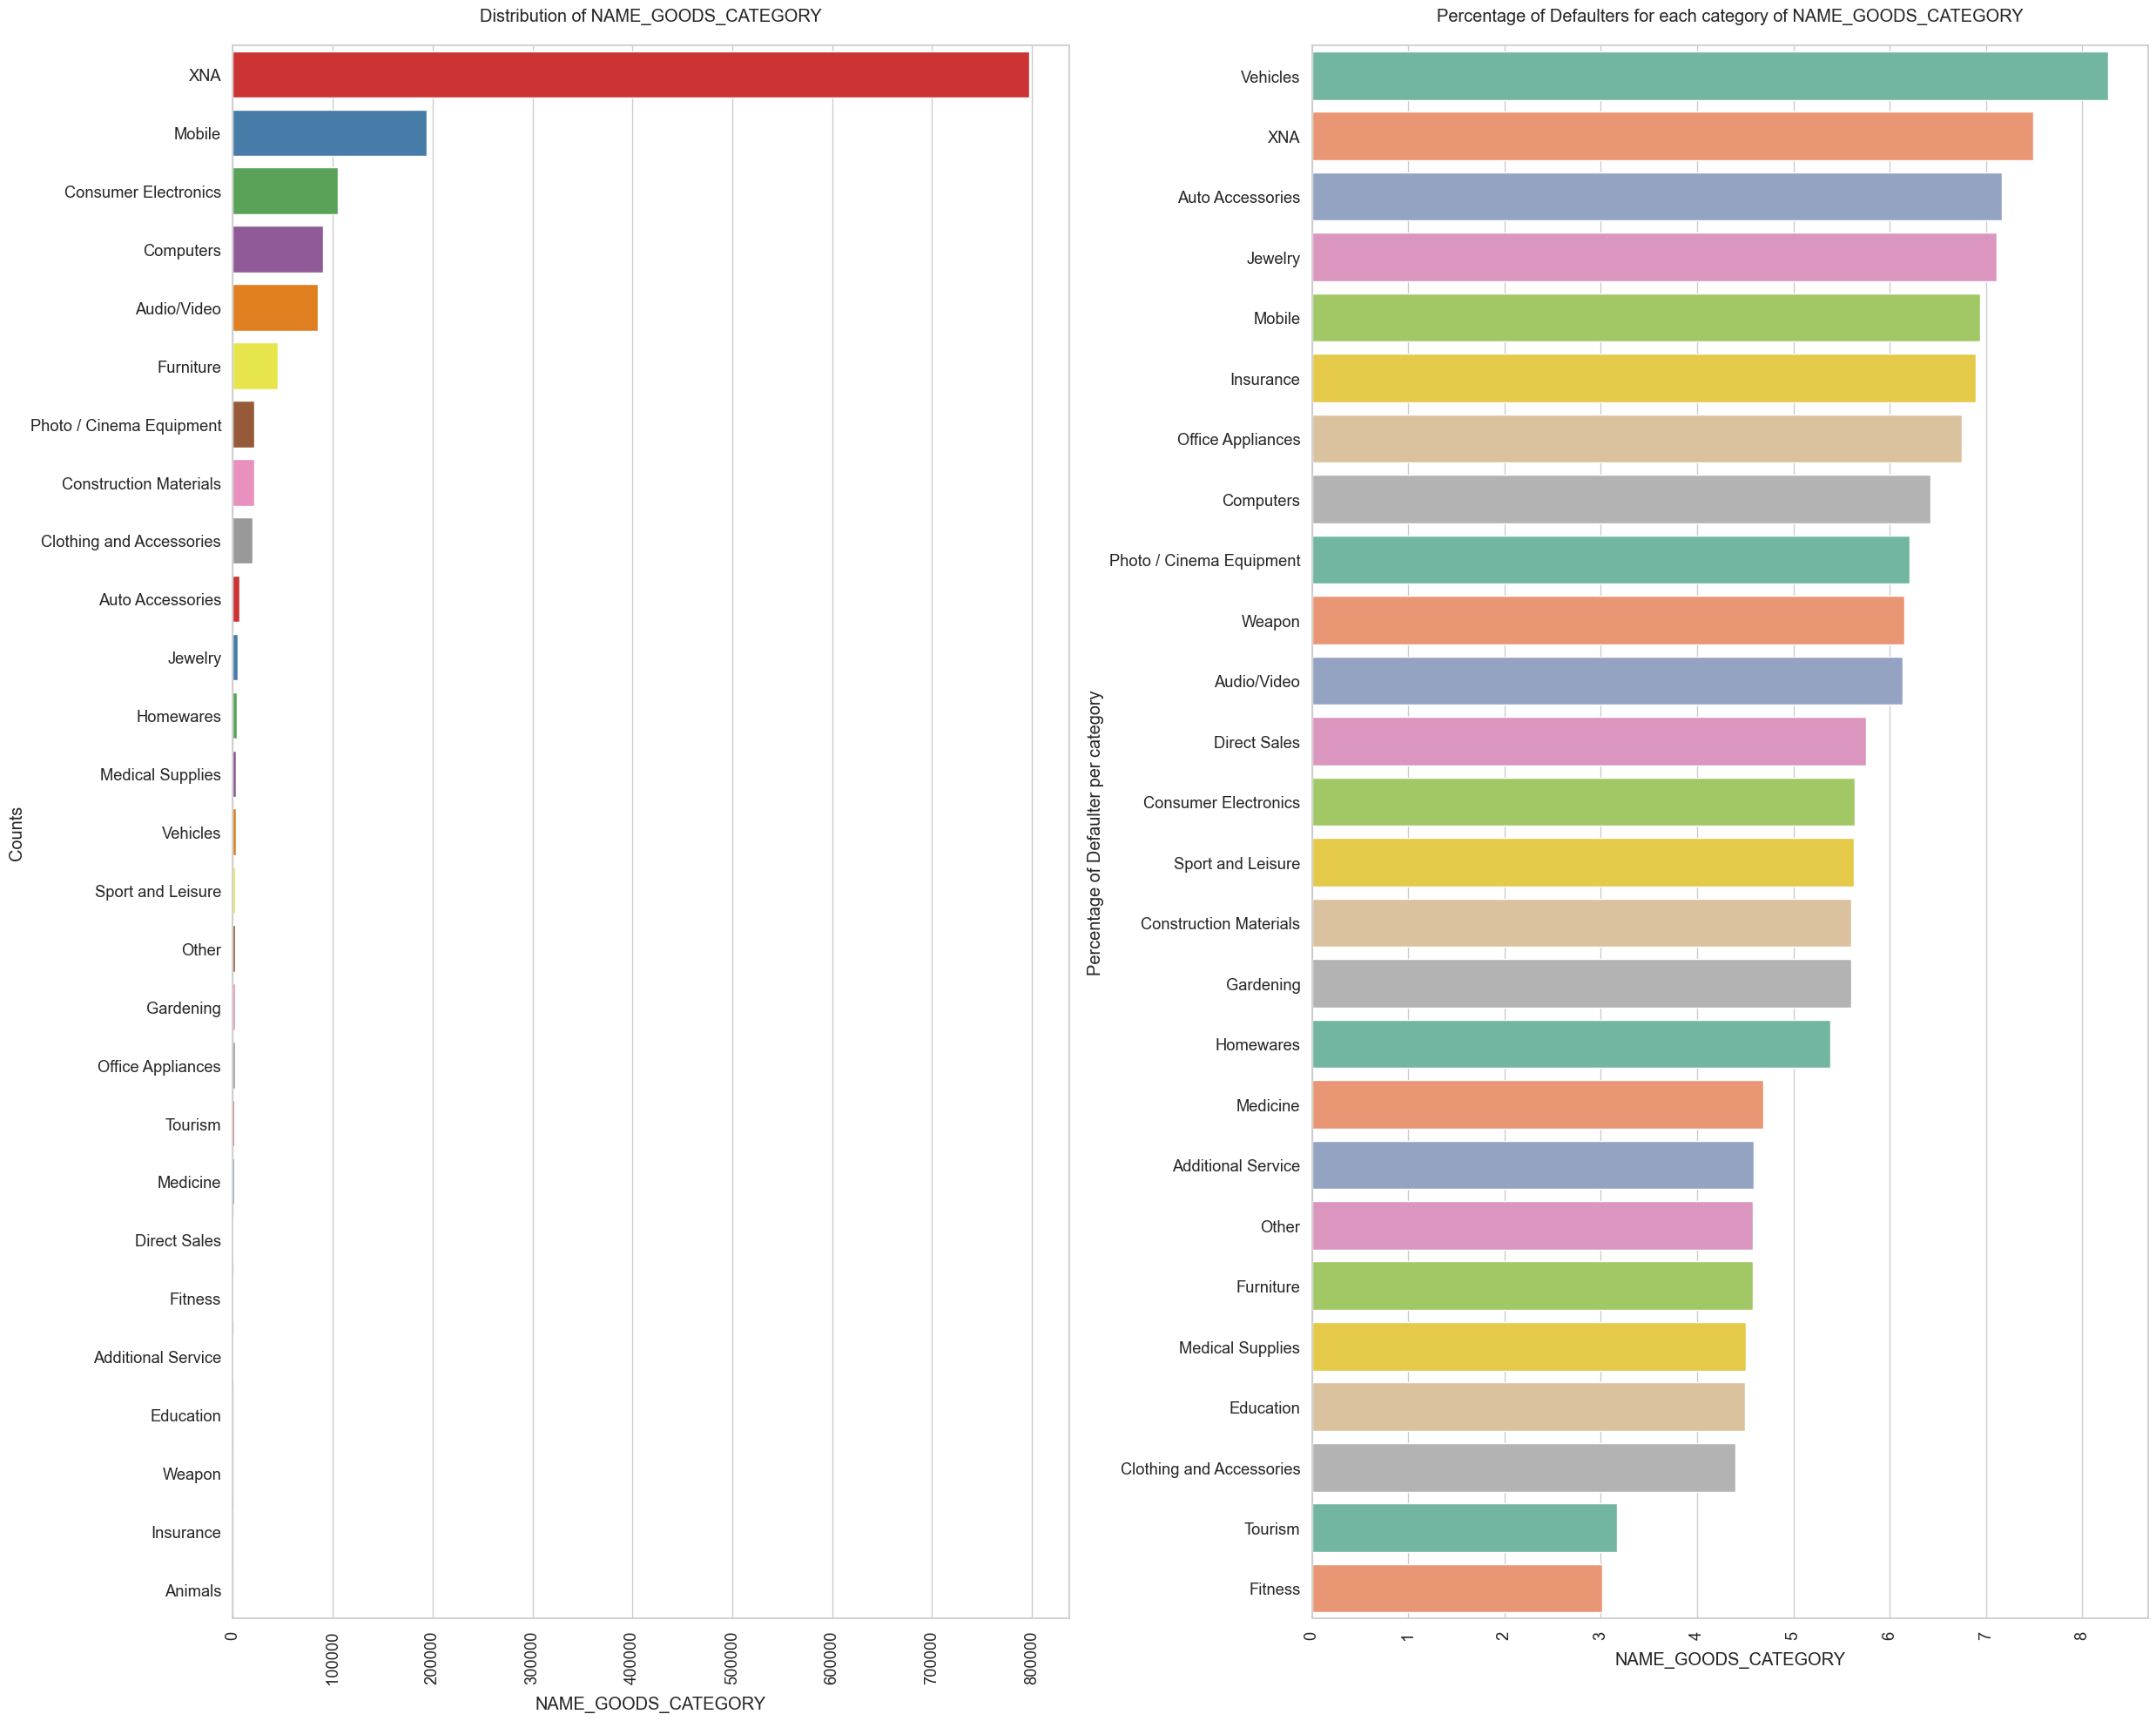

In [21]:
plot_categorical_variables_bar(prev, 'NAME_GOODS_CATEGORY', figsize = (25,20), horizontal=True)

### Observation
- Customers who borrow to purchase Jewelry and Vehicles have the highest default rates.



## 10.4 NAME_PORTFOLIO

Total Number of unique categories of NAME_PORTFOLIO = 5


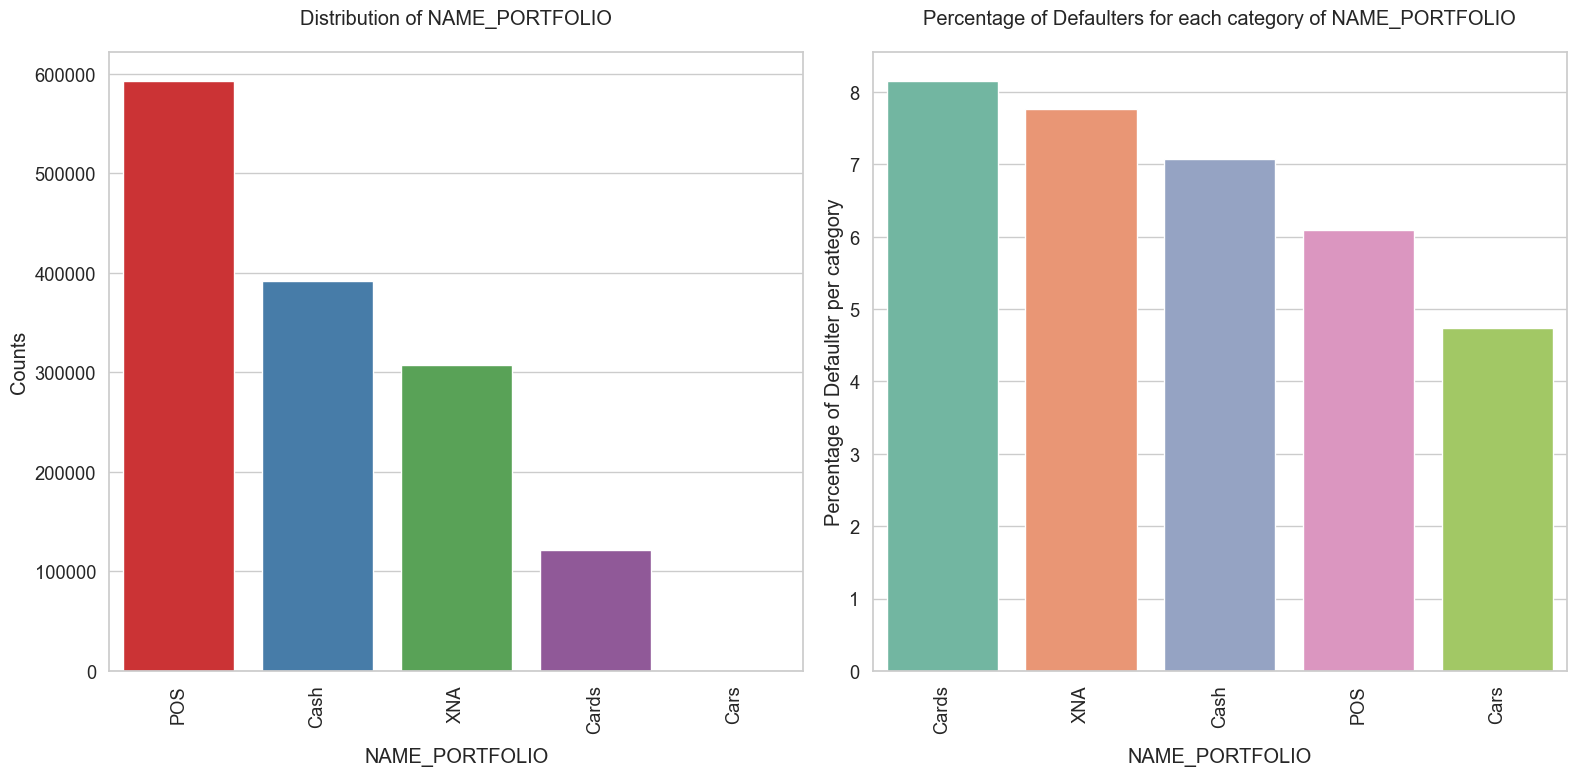

In [22]:
plot_categorical_variables_bar(prev, 'NAME_PORTFOLIO')

### Observation
- Customers who have borrowed Cashloans have a higher likelihood of defaulting on their loan payments compared to other categories

## 10.5 NAME_PRODUCT_TYPE

Total Number of unique categories of NAME_PRODUCT_TYPE = 3


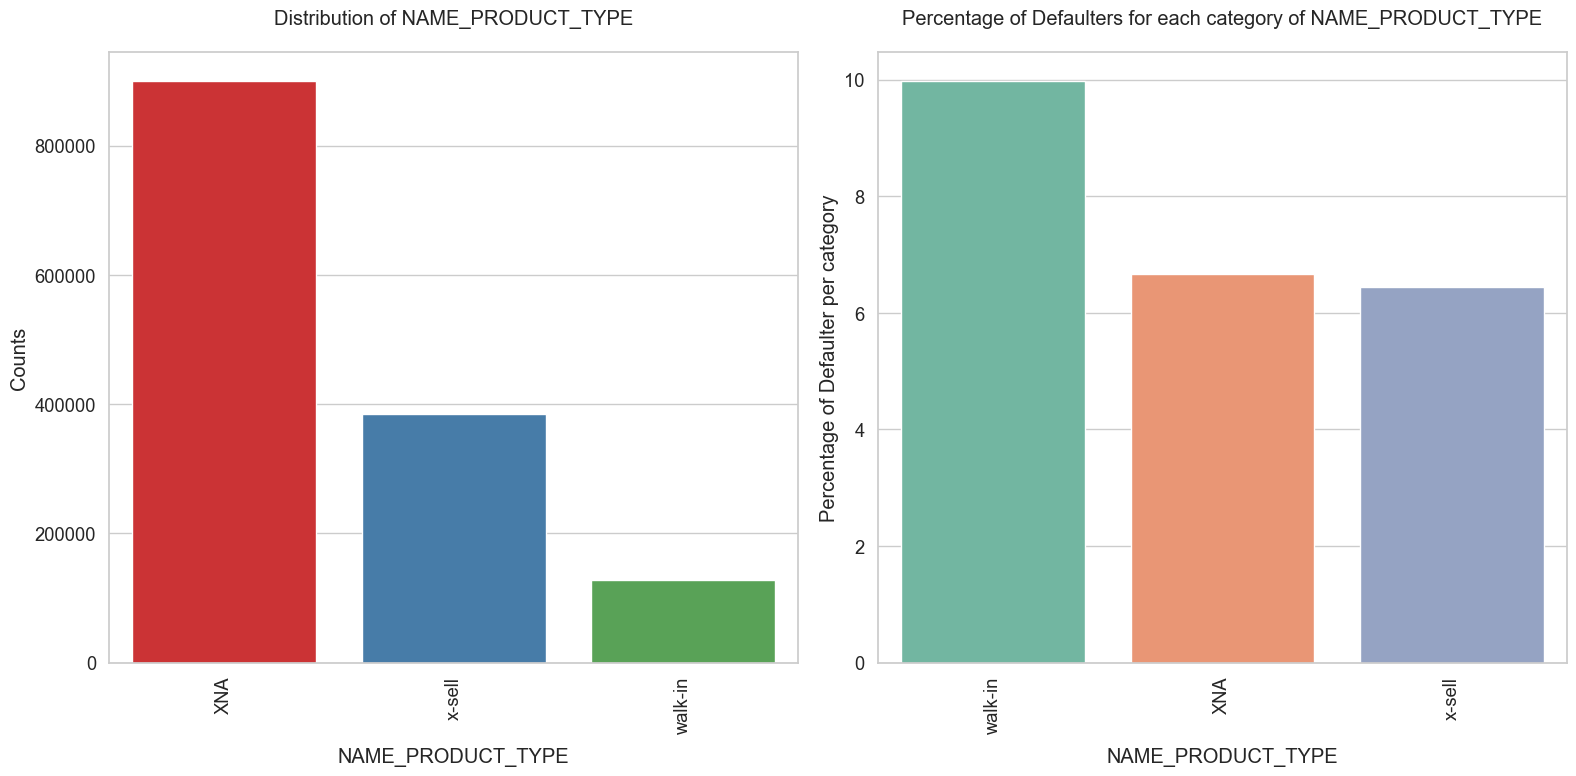

In [23]:
plot_categorical_variables_bar(prev, 'NAME_PRODUCT_TYPE')

### Observation
- Customers who fall under the "walk-in" category have a higher likelihood of defaulting on their loans compared to other product types.

## 10.6 CHANNEL_TYPE

Total Number of unique categories of CHANNEL_TYPE = 8


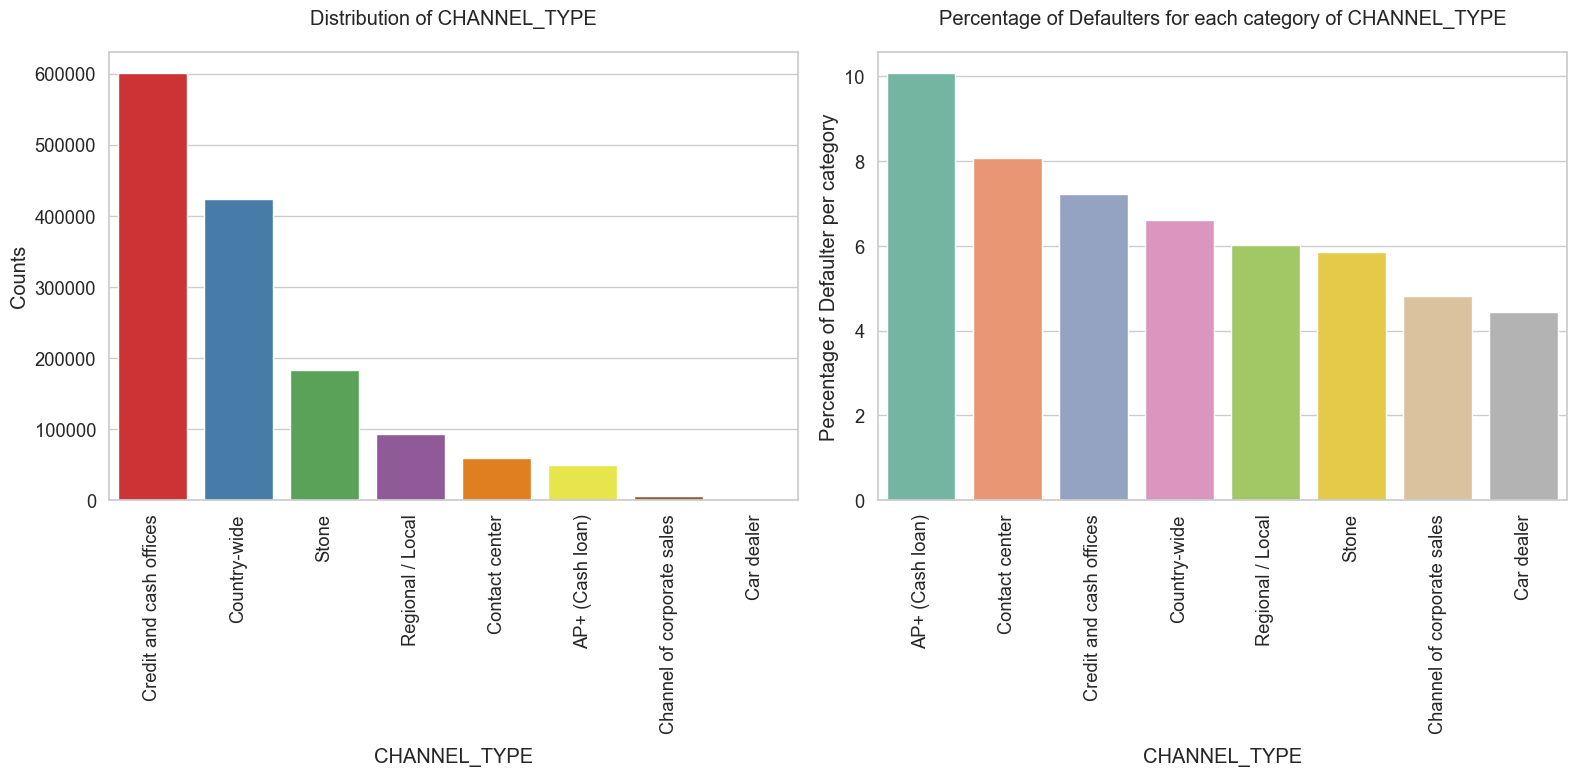

In [24]:
plot_categorical_variables_bar(prev, 'CHANNEL_TYPE')

### Observation
- The default rate is notably higher among customers classified as "AP+" compared to other channel types, indicating a greater likelihood of loan repayment difficulties for this particular category.

## 10.7 NAME_CONTRACT_STATUS

Total Number of unique categories of NAME_CONTRACT_STATUS = 4


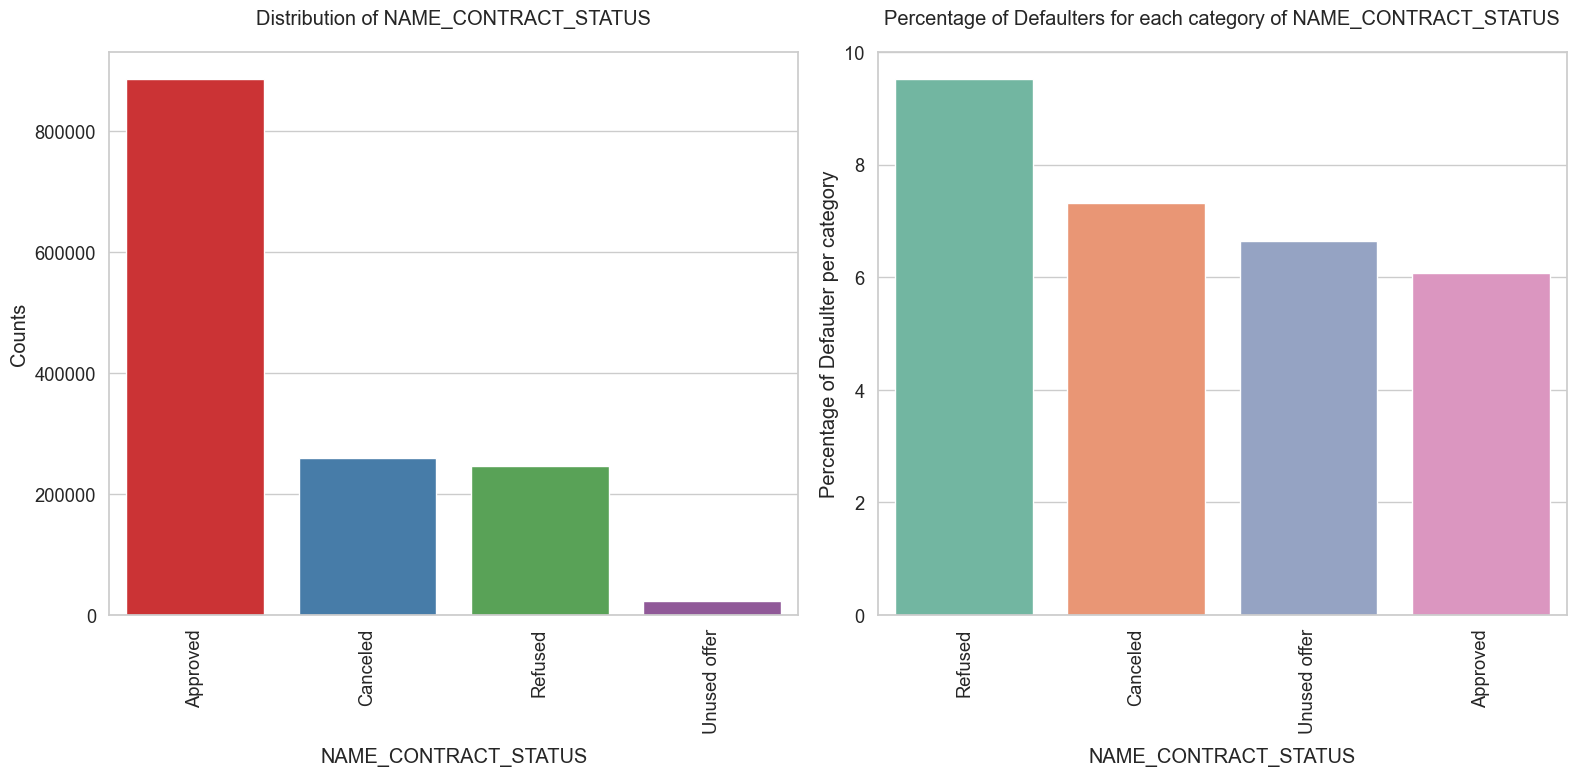

In [25]:
plot_categorical_variables_bar(prev, 'NAME_CONTRACT_STATUS')

### Observation
- The majority of previous applications have contract statuses of 'Approved'. The next two common contract statuses are 'Canceled' and 'Refused'. There is a relatively small number of cases, where the contract status is Unused offer.
- In terms of percent of defaults for current applications in the sample, clients with history of previous applications have largest percents of defaults when in their history contract statuses are Refused (12%), followed by Canceled (9%), Unused offer (~8%) and Approved (lowest percent of defaults in current applictions, with less than 8%).

## 10.8 NAME_CONTRACT_TYPE

Total Number of unique categories of NAME_CONTRACT_TYPE = 4


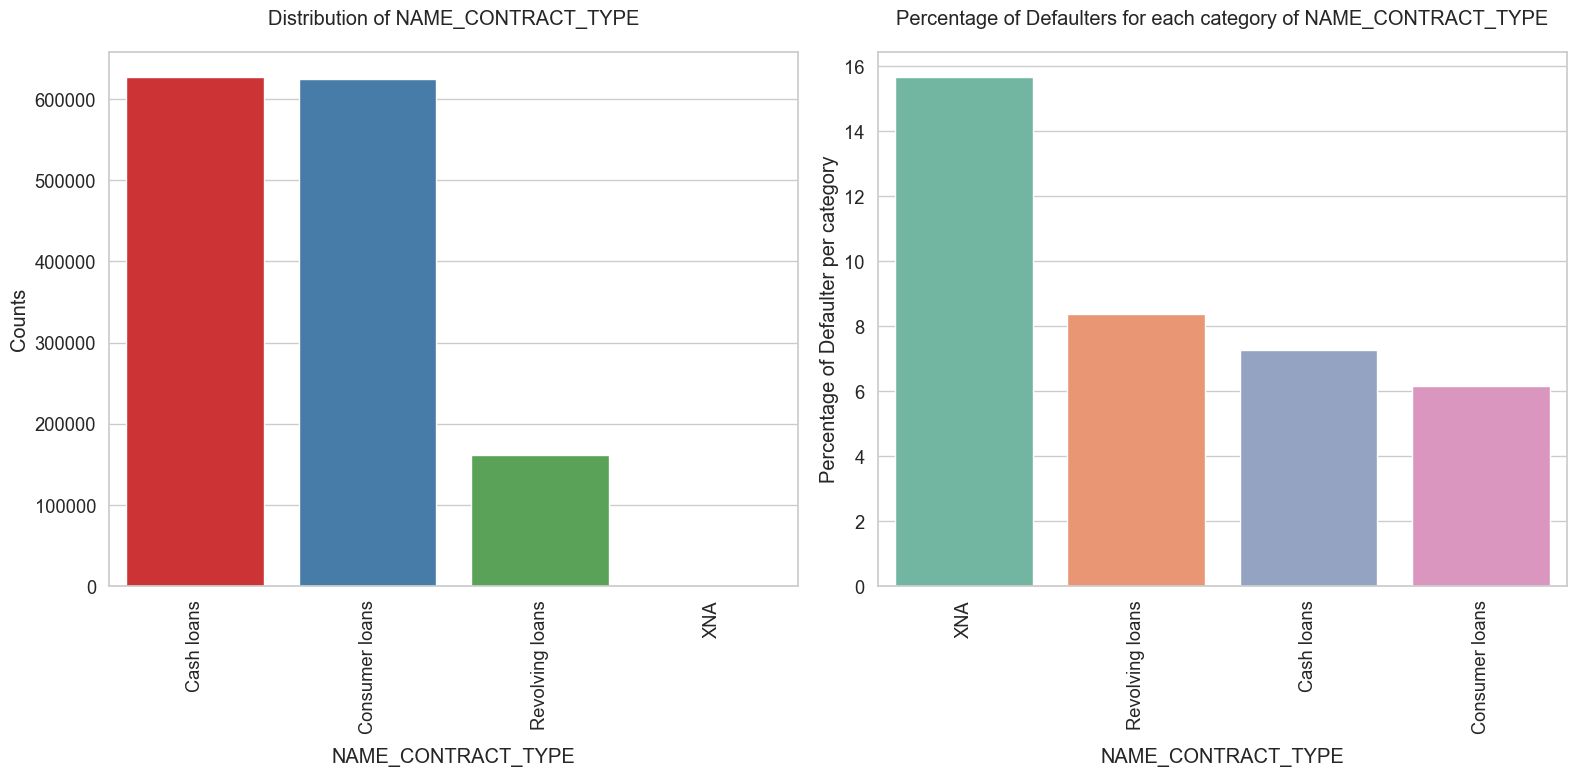

In [26]:
plot_categorical_variables_bar(prev, 'NAME_CONTRACT_TYPE')

### Observation
- From the first subplot, we see that most of the previous loans have been either Cash Loans or Consumer Loans. The remaining 11.41% corresponds to Revolving Loans, and there are some loans named XNA whose types are actually not known, but they are very few in numbers.
- Looking at the second subplot, we see that the Percentage of Defaulters for XNA type of loan are the highest, at 20% Default rate. The next highest Default Rate is among Revolving Loans, which is close to 10.5%.
- The Cash Loans have lesser default rates, roughly 9% while the consumer loans tend to have the lowest Percentage of Defaulters, which is close to 7.5%.

## 10.9 PRODUCT_COMBINATION

Total Number of unique categories of PRODUCT_COMBINATION = 18


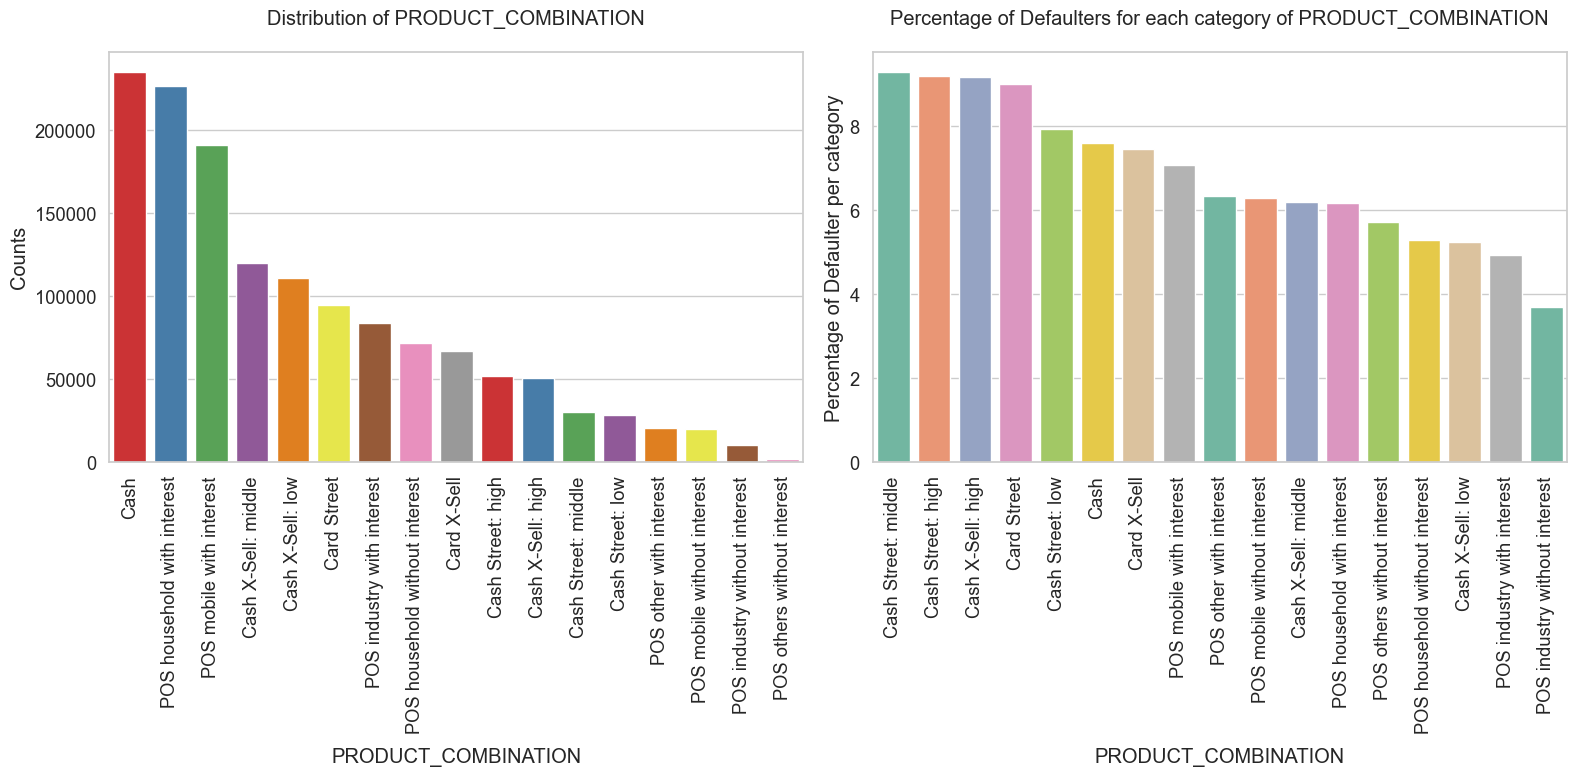

In [27]:
plot_categorical_variables_bar(prev, 'PRODUCT_COMBINATION')

### Observation
- The 3 most common types of Product Combination are Cash, POS household with interest and POS mobile with interest. 
- Looking at the Percentage of Defaulters per category plot, we see a highest defaulting tendency among Cash Street: mobile category, Cash X-sell: high, Cash Street: high and Card Street which all are near about 11-11.5% defaulters per category. The lowest Percentage of Defaulters are in the POS Industry without interest Category, which correspond to about 4.5% Defaulters.

# 11. Numerical analysis

## 11.1 AMT_ANNUITY


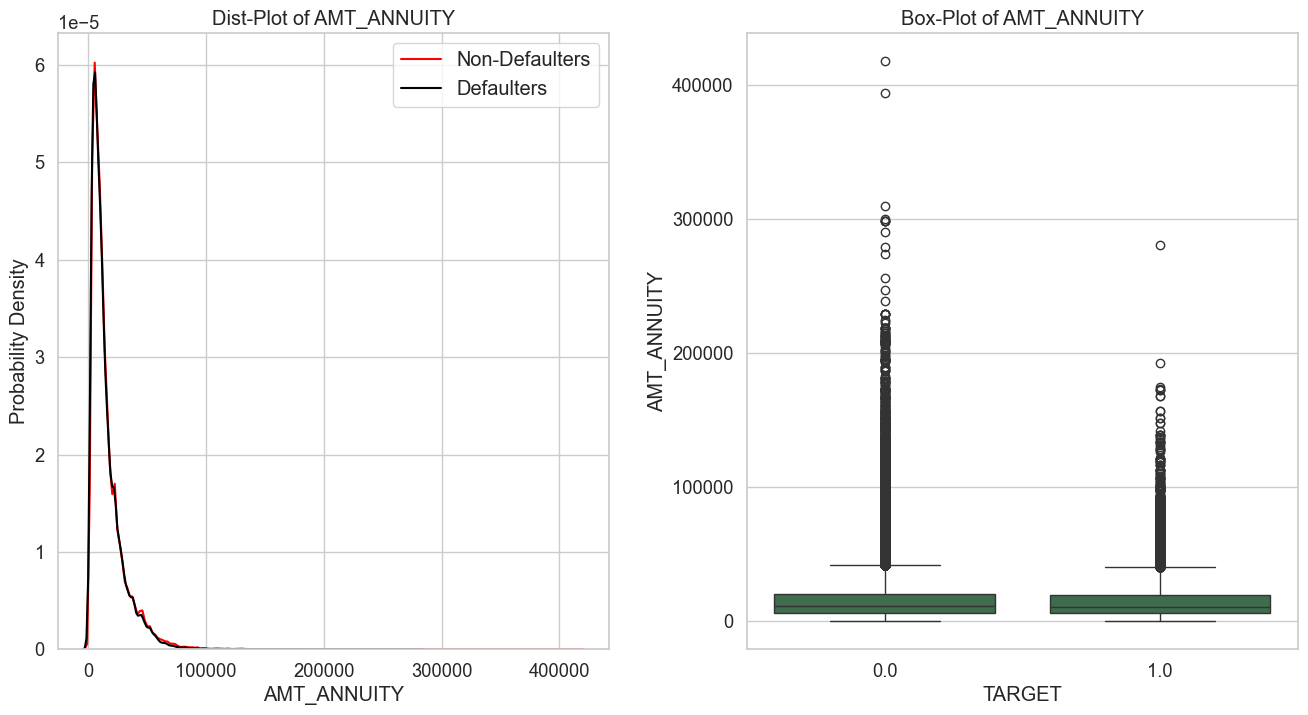

In [28]:
plot_continuous_variables(prev, 'AMT_ANNUITY', plots = ['distplot','box'], figsize = (16, 8))


### Observation
The higher the AMT_ANNUITY is, the lower the number of people defaulting on their loans is.



## 11.2 AMT_DOWN_PAYMENT

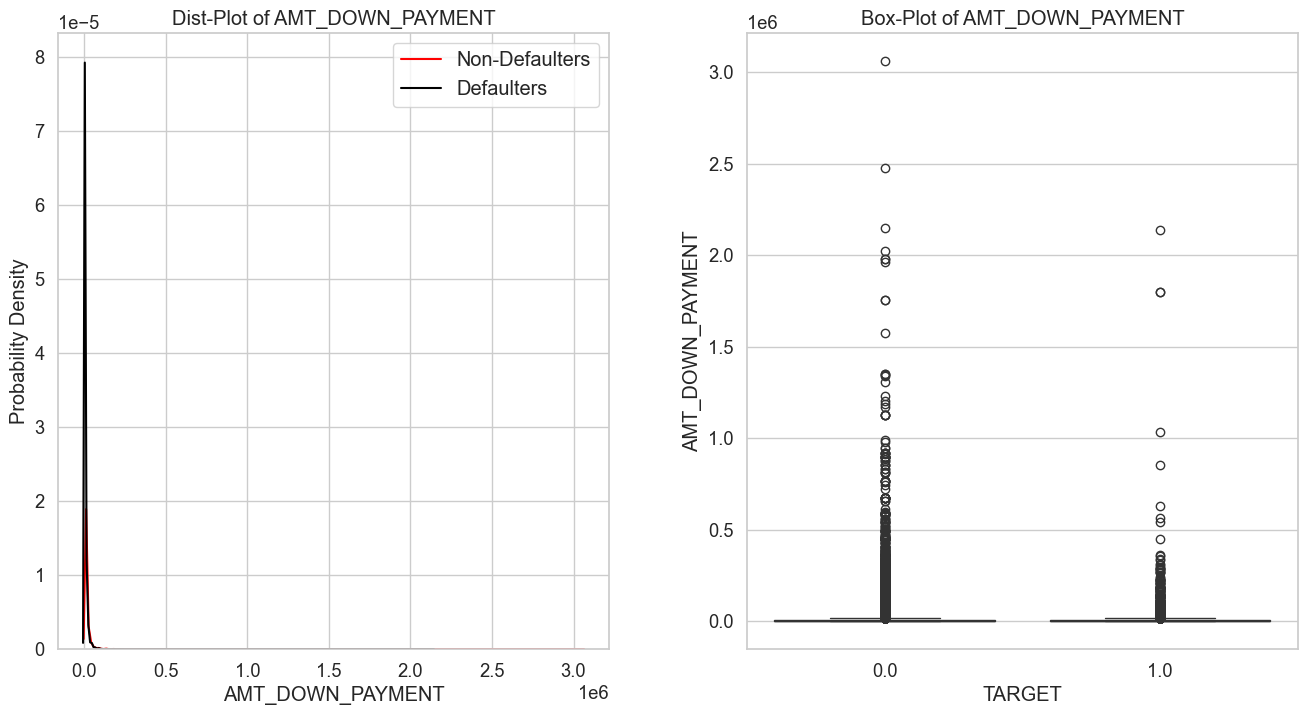

In [29]:
plot_continuous_variables(prev, 'AMT_DOWN_PAYMENT', plots = ['distplot','box'], figsize = (16, 8))


### Observation
The higher the DOWN_PAYMENT is, the lower the number of people defaulting on their loans is.



## 11.3 DAYS_DECISION

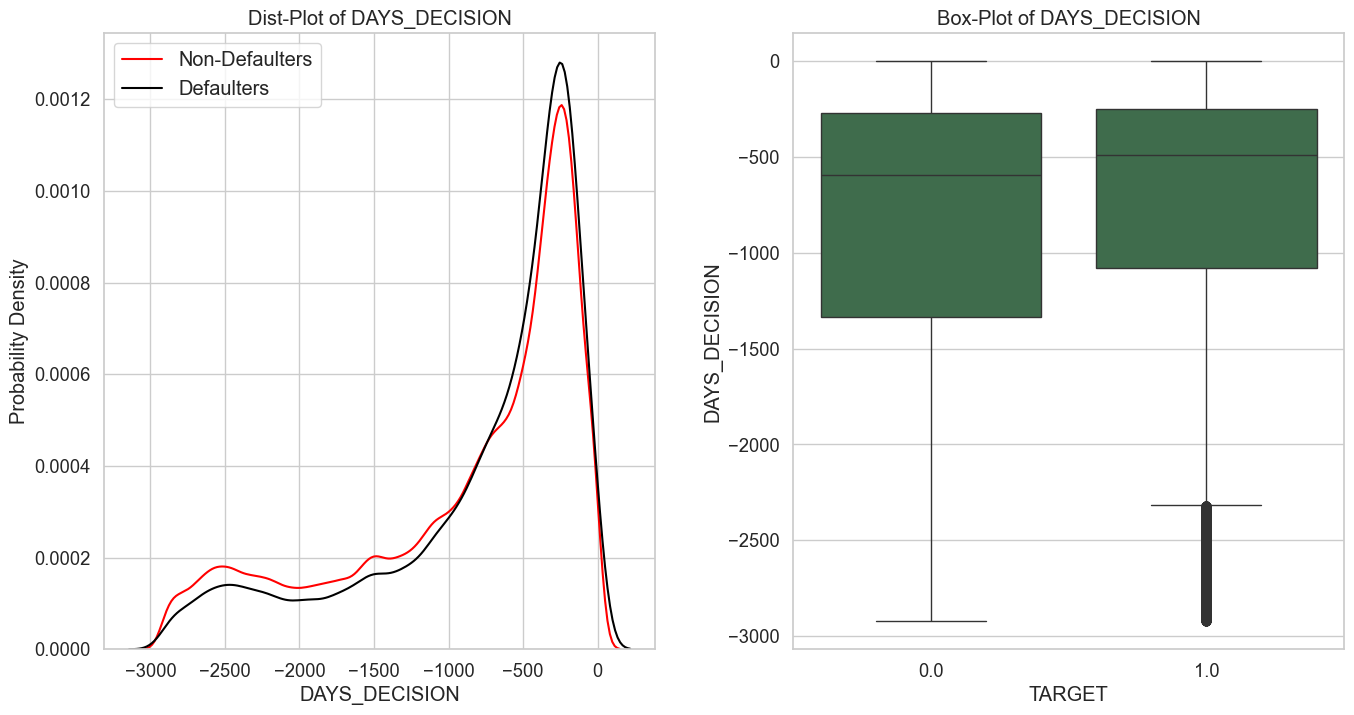

In [30]:
plot_continuous_variables(prev, 'DAYS_DECISION', plots = ['distplot','box'], figsize = (16, 8))


### Observation
From the above plot, we notice that for Defaulters, the number of days back when the decision was made is a bit lesser than that for Non-Defaulters. This implies that the Defaulters usually had the decision on their previous applications made more recently as compared to Non-Defaulters.

## 11.4 DAYS_FIRST_DRAWING

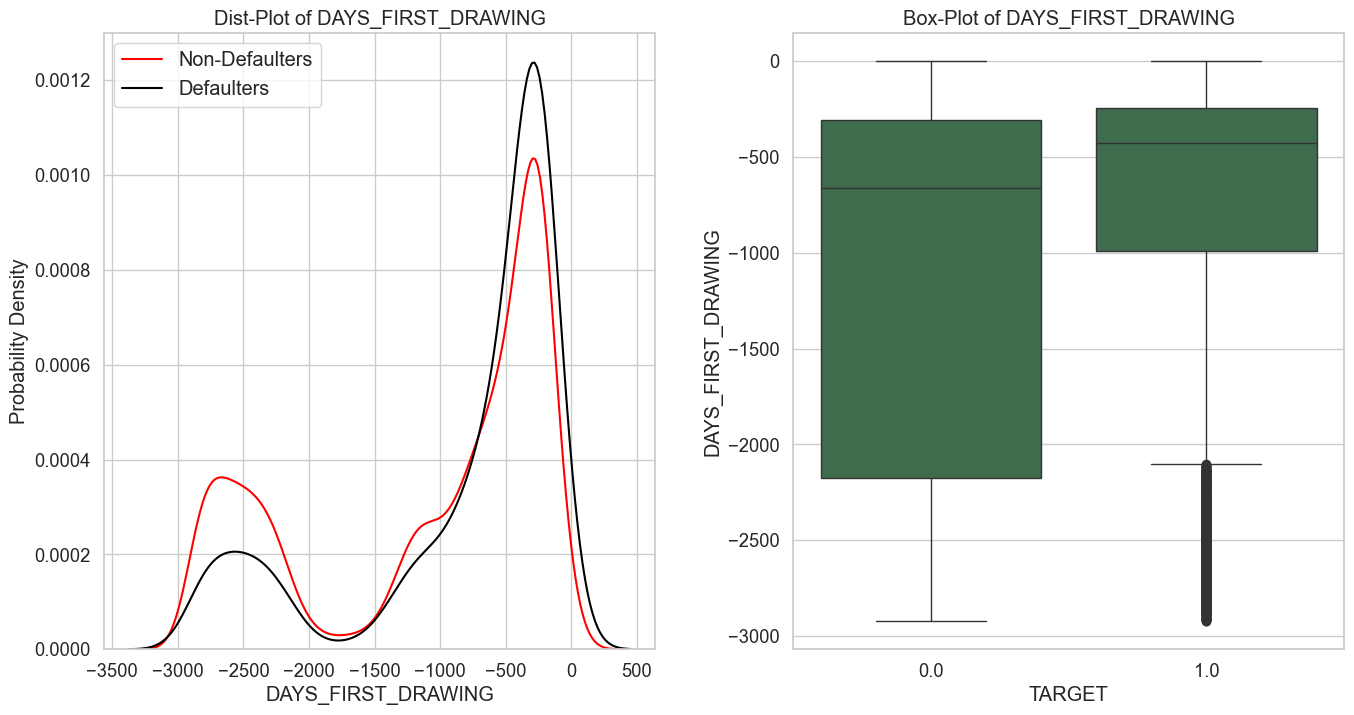

In [31]:
plot_continuous_variables(prev, 'DAYS_FIRST_DRAWING', plots = ['distplot','box'], figsize = (16, 8))


### Observation
- Looking at the percentile values of DAYS_FIRST_DRAWING, it seems like most of the values are erroneous. These erroneous values will needed to be dopped.
- If we try to analyze the distribution of this column by removing the erroneous points, we see that most of the Defaulters had their First Drawing on previous credit more recently as compared to Non-Defaulters. 

## 11.5 DAYS_FIRST_DUE

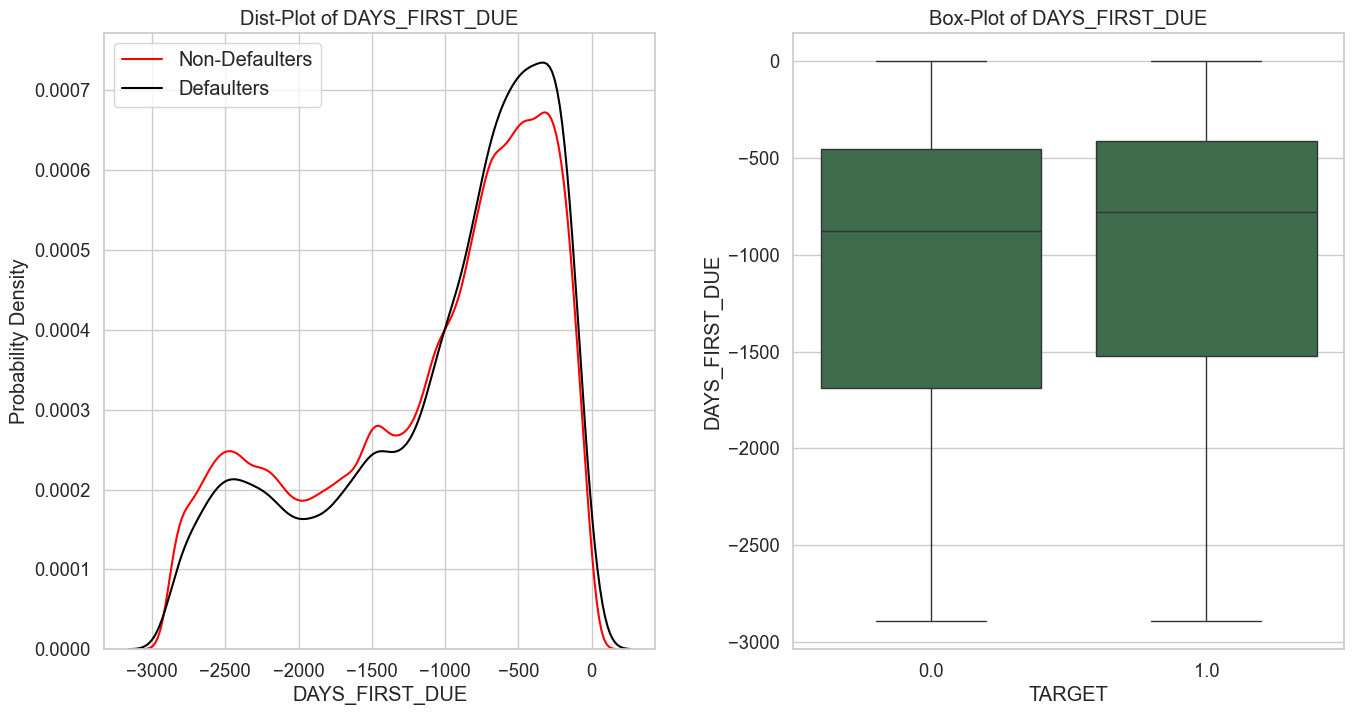

In [32]:
plot_continuous_variables(prev, 'DAYS_FIRST_DUE', plots = ['distplot','box'], figsize = (16, 8))

## 11.6 DAYS_LAST_DUE_1ST_VERSION

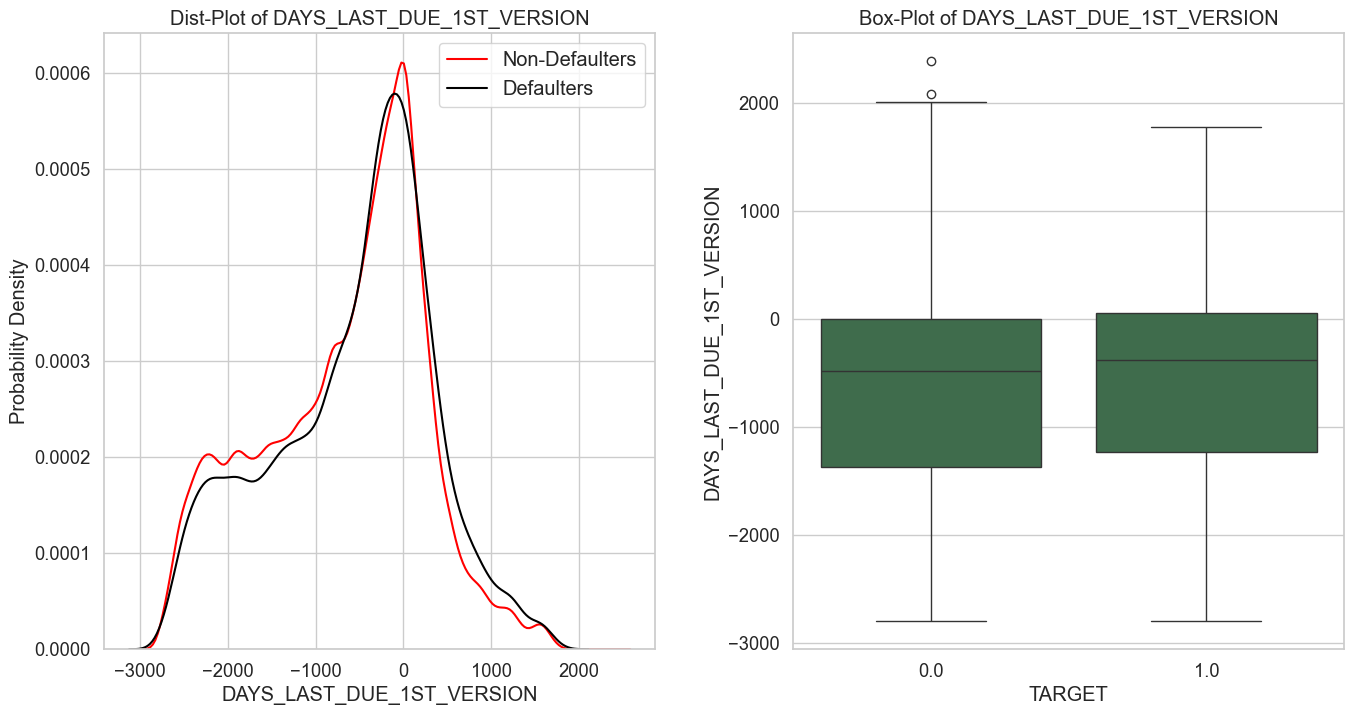

In [33]:
plot_continuous_variables(prev, 'DAYS_LAST_DUE_1ST_VERSION', plots = ['distplot','box'], figsize = (16, 8))


## 11.7 DAYS_LAST_DUE

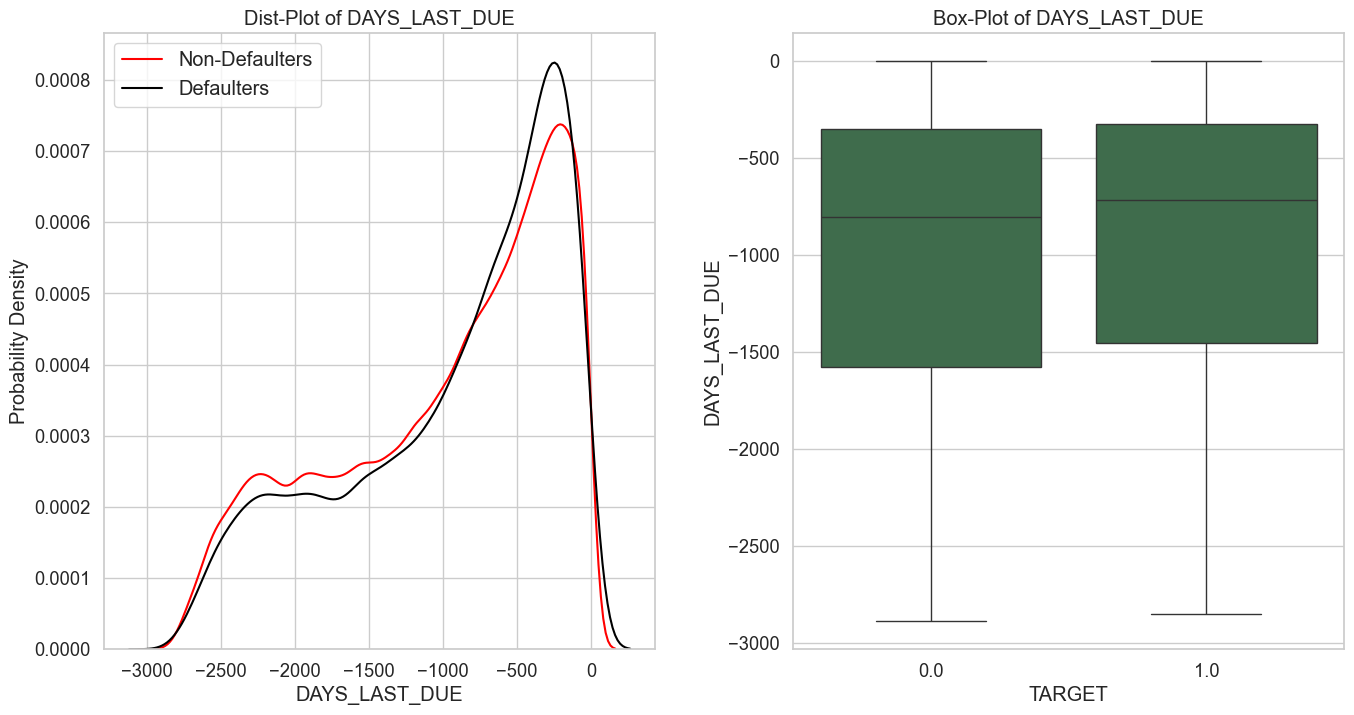

In [34]:
plot_continuous_variables(prev, 'DAYS_LAST_DUE', plots = ['distplot','box'], figsize = (16, 8))


## 11.8 DAYS_TERMINATION

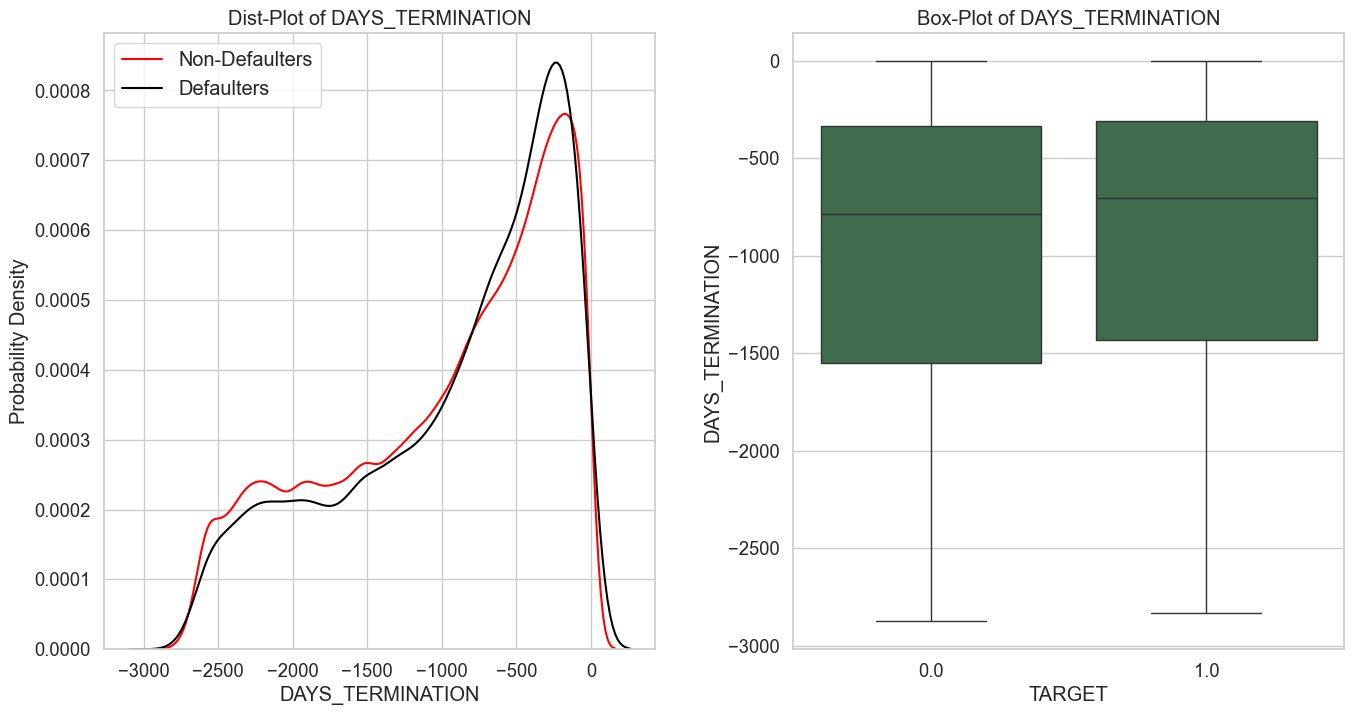

In [35]:
plot_continuous_variables(prev, 'DAYS_TERMINATION', plots = ['distplot','box'], figsize = (16, 8))


### Observation
From all of the above percentile values, we realise that all the Days columns have these erroneous values somewhere or the other. Thus these values need to be replaced so that our model doesn't get affected by these.